# Quicksort and Binary search

## 1. Quicksort
### Description
Quicksort is an 'in-place' sorting algorithm which employs 'divide-and-conquer' to sort an array. Quicksort works by selecting a 'pivot' element from the array and partitioning the other elements into sub-arrays according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This continues until each sub-array contains less than or equal to one element.

### Steps
**1. Choose a pivot:** 
Select a pivot element from the array.

**2. Partition:**
Partition the the array so that elements less than the pivot come before it, and elements greater than the pivot come after it.

**3. Recursively apply:**
Apply the above steps recursively on two sub-arrays, one containing elements less than the pivot and another containing elements greater than the pivot.

**4. Base Case:** If a sub-array has only one or zero elements, consider it sorted, and do not perform any more recursive calls on it.

### Time complexity
**Best-case:**
O(n log n) - Achieved when the pivot always divides the array into two almost equal halves.

**Average-case:**
O(n log n) - With a good pivot.

**Worst-case:**
O(n^2) - Occurs when the pivot is the smallest or largest element of the array, leading to unbalanced partitions.

### Space complexity
**Worst-case:**
O(log n) - Even in the worst case, quicksort has a logarithmic space complexity as it sorts in-place, requiring only a small additional amount of space for the recursive call.

### Considerations
**Pivot selection:**
Various strategies like choosing the first element, the last element, the middle element, or using a random element or median of medians as the pivot.

**Partitioning Schemes:** 
The two most common partitioning schemes are 'Hoare' and 'Lomuto'. Lomuto partition scheme is easier to implement, while the Hoare partition scheme is more efficient and performs fewer swaps on average.

### Implementation

#### Quicksort with out-of-place sorting
Quicksort is greatly simplified if one is not striving for in-place sorting. For the sake of first understanding the algorithm, let's start with out-of-place sorting.

In [18]:
def quicksortOutOfPlace(x):
    if len(x) <= 1:
        return x

    pivot = x[0]  # Choose first element as the pivot
    x1 = [item for item in x if item < pivot] # Subarray of all elements less than the pivot
    middle = [item for item in x if item == pivot] # Pivot element
    x2 = [item for item in x if item > pivot] # Subarray of all elements less than the pivot

    return quicksortOutOfPlace(x1) + middle + quicksortOutOfPlace(x2) # Recurse on subarrays and concatenate

#### Tests arrays

In [20]:
import numpy as np

# Randomly generate test arrays of elements of different types
np.random.seed(0) # Set seed
arrayLengths = [2, 3, 10, 100, 1000, 10000]
testArrays = []
for i in arrayLengths:
    testArrays.append(np.random.randint(-99, 100, i)) # Arrays of integers of various length, uniform from -99 to 99

for i in arrayLengths:
    testArrays.append(np.random.uniform(-99, 100, i)) # Arrays of floats of various length, uniform from -99 to 99

testArrays.append([-2, -1, 0, 1, 2, 3]) # Presorted ascending
testArrays.append([3, 2, 1, 0, -1, -2]) # Presorted descending
testArrays.append([9] * 9) # Identical elements

# Check if an array is sorted
def is_sorted(array):
    for i in range(len(array) - 1):
        if array[i] > array[i + 1]:
            return False
    return True

#### Testing

In [21]:
# Sort the arrays
sortedArrays = []
for i in testArrays:
    sortedArrays.append(quicksortOutOfPlace(i))

# Test the sorted arrays
test_results = [is_sorted(array) for array in sortedArrays]

# Print results
if test_results.count('False') > 0:
    for i, result in enumerate(test_results):
        if result == 'False':
            print(f"Array {i + 1} sorted incorrectly: {result}")
else: print('All sorted correctly')

sortedArrays

All sorted correctly


[[-52, 73],
 [-32, 18, 93],
 [-90, -78, -63, -41, -29, -12, -11, 4, 41, 96],
 [-99,
  -98,
  -93,
  -90,
  -90,
  -88,
  -82,
  -76,
  -74,
  -71,
  -70,
  -68,
  -68,
  -67,
  -67,
  -65,
  -64,
  -63,
  -61,
  -60,
  -57,
  -52,
  -51,
  -50,
  -46,
  -46,
  -42,
  -34,
  -31,
  -30,
  -27,
  -22,
  -21,
  -20,
  -20,
  -18,
  -17,
  -17,
  -15,
  -14,
  -12,
  -11,
  -8,
  -5,
  -4,
  0,
  0,
  1,
  3,
  6,
  14,
  15,
  16,
  18,
  20,
  21,
  22,
  28,
  28,
  29,
  29,
  29,
  32,
  33,
  34,
  41,
  42,
  43,
  43,
  44,
  48,
  48,
  49,
  49,
  52,
  64,
  64,
  65,
  66,
  68,
  70,
  70,
  71,
  75,
  75,
  76,
  78,
  79,
  81,
  84,
  86,
  87,
  87,
  93,
  93,
  94,
  94,
  97,
  98,
  98],
 [-99,
  -99,
  -99,
  -99,
  -99,
  -99,
  -99,
  -98,
  -97,
  -97,
  -97,
  -97,
  -97,
  -97,
  -97,
  -97,
  -96,
  -96,
  -96,
  -96,
  -96,
  -96,
  -96,
  -96,
  -95,
  -95,
  -95,
  -95,
  -95,
  -95,
  -94,
  -94,
  -94,
  -94,
  -93,
  -93,
  -93,
  -93,
  -93,
  -93,
  -92

#### Hoare Partitioning Scheme
Quicksort with a more complicated, but more efficient, partitioning scheme

In [22]:
def partitionHoare(x, low, high):
    pivot = x[low] # Choose first element as the pivot (arbitrary)
    i = low + 1 # Left side pointer begins after pivot
    j = high # Right side pointer beings at the end of the array/subarray
        
    while True:
        while i <= j and x[i] <= pivot: # Scan (increment) until encountering an element greater than or equal to the pivot
            i += 1
        while i <= j and x[j] >= pivot: # Scan (decrement) until encountering an element less than or equal to the pivot
            j -= 1
        if i >= j: # Partitioning completes when pointers meet or cross
            break
        x[i], x[j] = x[j], x[i] # Swap elements at i and j

    x[low], x[j] = x[j], x[low] # Swap pivot with the element at the final j position
    return j # Return the index of the pivot, array/subarray is partitioned in place

#### Quicksort with Hoare partitioning

In [26]:
def quicksortHoare(x, low=0, high=None):
    if high is None: # Sort the entire array if high is not specified
        high = len(x) - 1
    
    if high - low > 0: # If the current array/subarray is more than one element
        pivotPos = partitionHoare(x, low, high) # Partition the array and get the pivot position
        quicksortHoare(x, low, pivotPos - 1) # Recursively apply function to the left of the pivot
        quicksortHoare(x, pivotPos + 1, high) # Recursively apply function to the right of the pivot
    
    return x

#### Test arrays

In [27]:
import numpy as np

#Randomly generate test arrays of elements of different types
np.random.seed(0) # Set seed
arrayLengths = [2, 3, 10, 100, 1000, 10000]
testArrays = []
for i in arrayLengths:
    testArrays.append(np.random.randint(-99, 100, i)) #Arrays of integers of various length, uniform from -99 to 99

for i in arrayLengths:
    testArrays.append(np.random.uniform(-99, 100, i)) #Arrays of floats of various length, uniform from -99 to 99

testArrays.append([-2, -1, 0, 1, 2, 3]) #Presorted ascending
testArrays.append([3, 2, 1, 0, -1, -2]) #Presorted descending
testArrays.append([9] * 9) #Identical elements

# Check if an array is sorted
def is_sorted(array):
    for i in range(len(array) - 1):
        if array[i] > array[i + 1]:
            return False
    return True

#### Testing

In [28]:
#Sort the arrays
sortedArrays = []
for i in testArrays:
    sortedArrays.append(quicksortHoare(i))

# Test the sorted arrays
test_results = [is_sorted(array) for array in sortedArrays]

# Print results
if test_results.count('False') > 0:
    for i, result in enumerate(test_results):
        if result == 'False':
            print(f"Array {i + 1} sorted incorrectly: {result}")
else: print('All sorted correctly')

sortedArrays

All sorted correctly


[array([-52,  73]),
 array([-32,  18,  93]),
 array([-90, -78, -63, -41, -29, -12, -11,   4,  41,  96]),
 array([-99, -98, -93, -90, -90, -88, -82, -76, -74, -71, -70, -68, -68,
        -67, -67, -65, -64, -63, -61, -60, -57, -52, -51, -50, -46, -46,
        -42, -34, -31, -30, -27, -22, -21, -20, -20, -18, -17, -17, -15,
        -14, -12, -11,  -8,  -5,  -4,   0,   0,   1,   3,   6,  14,  15,
         16,  18,  20,  21,  22,  28,  28,  29,  29,  29,  32,  33,  34,
         41,  42,  43,  43,  44,  48,  48,  49,  49,  52,  64,  64,  65,
         66,  68,  70,  70,  71,  75,  75,  76,  78,  79,  81,  84,  86,
         87,  87,  93,  93,  94,  94,  97,  98,  98]),
 array([-99, -99, -99, -99, -99, -99, -99, -98, -97, -97, -97, -97, -97,
        -97, -97, -97, -96, -96, -96, -96, -96, -96, -96, -96, -95, -95,
        -95, -95, -95, -95, -94, -94, -94, -94, -93, -93, -93, -93, -93,
        -93, -92, -92, -92, -92, -92, -91, -91, -91, -90, -90, -90, -90,
        -90, -90, -89, -89, -89, -89,

#### Lomuto partitioning: a simplier but sometimes less effcient scheme

In [29]:
def partitionLomuto(x, low, high):
    pivot = x[high] # Use the last element as the pivot
    i = low

    for j in range(low, high): # Scan the entire segment
        if x[j] < pivot: # If an element is less than the pivot, swap and increment
            x[i], x[j] = x[j], x[i]
            i += 1

    x[i], x[high] = x[high], x[i] # Place the pivot in the correct position
    return i

# As before, but with Lomuto partitioning
def quicksortLomuto(x, low=0, high=None):
    if high is None:
        high = len(x) - 1

    if low < high:
        pivotPos = partitionLomuto(x, low, high)
        quicksortLomuto(x, low, pivotPos - 1)
        quicksortLomuto(x, pivotPos + 1, high)

    return x

#### Test arrays

In [30]:
import numpy as np

#Randomly generate test arrays of elements of different types
np.random.seed(0) # Set seed
arrayLengths = [2, 3, 10, 100, 1000, 10000]
testArrays = []
for i in arrayLengths:
    testArrays.append(np.random.randint(-99, 100, i)) #Arrays of integers of various length, uniform from -99 to 99

for i in arrayLengths:
    testArrays.append(np.random.uniform(-99, 100, i)) #Arrays of floats of various length, uniform from -99 to 99

testArrays.append([-2, -1, 0, 1, 2, 3]) #Presorted ascending
testArrays.append([3, 2, 1, 0, -1, -2]) #Presorted descending
testArrays.append([9] * 9) #Identical elements

# Check if an array is sorted
def is_sorted(array):
    for i in range(len(array) - 1):
        if array[i] > array[i + 1]:
            return False
    return True

#### Testing

In [31]:
#Sort the arrays
sortedArrays = []
for i in testArrays:
    sortedArrays.append(quicksortLomuto(i))

# Test the sorted arrays
test_results = [is_sorted(array) for array in sortedArrays]

# Print results
if test_results.count('False') > 0:
    for i, result in enumerate(test_results):
        if result == 'False':
            print(f"Array {i + 1} sorted incorrectly: {result}")
else: print('All sorted correctly')

sortedArrays

All sorted correctly


[array([-52,  73]),
 array([-32,  18,  93]),
 array([-90, -78, -63, -41, -29, -12, -11,   4,  41,  96]),
 array([-99, -98, -93, -90, -90, -88, -82, -76, -74, -71, -70, -68, -68,
        -67, -67, -65, -64, -63, -61, -60, -57, -52, -51, -50, -46, -46,
        -42, -34, -31, -30, -27, -22, -21, -20, -20, -18, -17, -17, -15,
        -14, -12, -11,  -8,  -5,  -4,   0,   0,   1,   3,   6,  14,  15,
         16,  18,  20,  21,  22,  28,  28,  29,  29,  29,  32,  33,  34,
         41,  42,  43,  43,  44,  48,  48,  49,  49,  52,  64,  64,  65,
         66,  68,  70,  70,  71,  75,  75,  76,  78,  79,  81,  84,  86,
         87,  87,  93,  93,  94,  94,  97,  98,  98]),
 array([-99, -99, -99, -99, -99, -99, -99, -98, -97, -97, -97, -97, -97,
        -97, -97, -97, -96, -96, -96, -96, -96, -96, -96, -96, -95, -95,
        -95, -95, -95, -95, -94, -94, -94, -94, -93, -93, -93, -93, -93,
        -93, -92, -92, -92, -92, -92, -91, -91, -91, -90, -90, -90, -90,
        -90, -90, -89, -89, -89, -89,

## 2. Binary search

### Description
Binary Search is an algorithm for finding an element from a sorted list. It works by repeatedly dividing in half the portion of the list that could contain the item, until the possible locations has been narrowed to one.

### Steps
**1. Identify the middle:**
Find the middle element of the array. If the array has an odd number of elements, the choice of middle is clear; if an even number, choose one of the two middle elements.

**2. Compare the middle:**
Compare the middle element with the target value.

**3. Decide the direction:**
If the middle element equals the target, the search is complete.
If the middle element is greater than the target, repeat the search in the left half of the array.
If the middle element is less than the target, repeat the search in the right half of the array.

**4. Base Case:**
When the target element is found or when the sub-array length becomes zero (element is not in the array).

### Time complexity
**Best-case:**
O(1) - Occurs when the initial middle element of the array is the target value.

**Average-case:**
O(log n) - The array is halved in every step.

**Worst-case:**
O(log n) - The target value is in the last position checked or not in the array at all.

### Space complexity
**Worst-case:**
O(1) - Binary search can be implemented iteratively using a constant amount of space.

### Considerations
**Sorted Input:**
Binary search requires that the input array be sorted.

**Iterative vs Recursive:**
Binary search can be implemented in both iterative and recursive ways. The iterative approach is usually more space-efficient.

### Implementation

In [51]:
def bSearch(target, searchArr):
    low = 0 # Search initially includes 
    high = len(searchArr) - 1
    computations = 0  # Counter for the number of computations
    
    while low <= high:
        computations += 1  # Increment the counter
        midPoint = (low + high) // 2 # Compute middle element index; floor division used handling even lengthed arrays: lower element chosen. 
        
        if target == searchArr[midPoint]: # Target found at mid index
            return midPoint, computations
        elif target > searchArr[midPoint]: # Target greater than element at mid index, search right half next iteration
            low = midPoint + 1
        else: # Target less than element at mid index, search left half next iteration
            high = midPoint - 1
    
    return 'target not present' # Target not found in array

### Benchmarking

In [299]:
def roundUP(x): # Function to compute rounded up integer
    xRoundedUp = int(x) + (x > 0 and x - int(x) > 0) # If x is positive and greater than int(x)
    return xRoundedUp

# Probability of finding target after k computations
def bSearchProb(x, k): # Array, computations (iterations completed)
    if (k < np.log2(len(x))): # Up to theoretical max computations
        p_k = 2**(k-1)/len(x) # Proportional to search space (array length), search space halves every iteration
    else:
        p_k = 0 # Otherwise zero
    return p_k

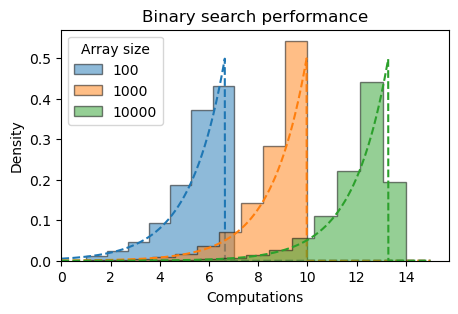

In [300]:
import matplotlib.pyplot as plt

np.random.seed(0) # Set seed
arrayLengths = [int(i) for i in [1e2, 1e3, 1e4]] # Benchmark array lengths

# Create list of (quick)sorted arrays of integers of desired length
benchmarkArrays = []
for i in arrayLengths:
    benchmarkArrays.append(quicksortHoare(np.random.choice(range(0, arrayLengths[-1]), i, replace = False))) # Array elements sampled from range of largest array, no repeated elements

results = [[] for _ in arrayLengths] # Create empty list of lists
for i, array in enumerate(benchmarkArrays):
    for element in array:
        computations = bSearch(element, array)[1] # Return computation count for binary search of each element for each array
        results[i].append(computations) # Store results

# Plot results
colors = ['tab:blue', 'tab:orange', 'tab:green']
x = np.linspace(0, 15, 2000) # x-values for model

plt.figure(figsize = (5, 3))
for i,result in enumerate(results):
    plt.hist(result, density = True, histtype = 'step', fill = colors[i], alpha = 0.5, edgecolor = 'black', bins = len(np.unique(result)), label = arrayLengths[i])
    plt.plot(x, [bSearchProb(benchmarkArrays[i], j) for j in x], color = colors[i], ls = '--') # Continuous probability model

plt.xlim(0,)
plt.xlabel('Computations')
plt.ylabel('Density')
plt.legend(title = 'Array size')
plt.title('Binary search performance')
plt.show()

##### Comment: Some error near theoretical worst case (log2(n)) due to real computations being integer.